# **PA 01: k-NN Classification** 

### Instructions


*   The aim of this assignment is to give you hands-on experience with a real-life
machine learning application.
*   You will be implementing a kNN-based digit classifier.
*   You must use the Python programming language.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment1. Zip these files in a folder and name
the folder Name_RollNo_Assignment1. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**

### Introduction

The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You will be training a k-NN model and using it to classify images of handwritten digits from the famous **MNIST dataset**, which contains 70,000
images of digits and their respective labels. You will first implement the code from scratch and then replicate the entire code using the scikit-learn library.

## **Part 1: Implement from Scratch (75 marks)**

You are not allowed to use scikit-learn or any other machine learning toolkit for this
part. You have to implement your own k-NN classifier from scratch. You may use
Pandas, NumPy, Matplotlib, Seaborn, and other standard Python libraries.

### Importing Libraries

In [639]:
# Importing relevant libraries. You may add other libraries if needed (except scikit-learn or any other machine learning toolkit)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

### Loading Dataset

The MNIST dataset consists of 70,000 labelled images of handwritten digits, each of size 28 pixels by 28 pixels. 

The dataset given to you is in a CSV file. The CSV file has 70,001 rows and 785 columns. Each row represents one image of a handwritten digit.
The first row indicates what each column means (Print the loaded dataset to understand this). You should remove this row when creating the dataset. 
The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

For quicker computation, you will sample 20% of the entire dataset.

You can use the Pandas library to load the CSV file but the final dataset should be stored in a Numpy array of shape (14000, 785).

In [ ]:
# Mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [640]:
# Load the dataset from the folder on Drive where you have saved the dataset. Path will be like "/content/drive/..." 

#########################

data = pd.read_csv(r'D:\u_Senior_Fall\ML\Assignments\Assignment1\Assignment1\mnist_digit\mnist.csv')
data.drop([0], axis=0, inplace=True)
data.head()

#########################

C:\users\23100\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [641]:
# Sample 20% of the dataset. Please note that this is not the train-test split. This is just a sample of the dataset. We are doing this to reduce the computation time.

#########################

data = data.sample(n=14000)
data.info()
data.head()

#########################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46191 to 38323
Columns: 785 entries, 0 to 784
dtypes: object(785)
memory usage: 84.0+ MB


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
46191,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12486,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27798,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23782,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [642]:
# Implement a function to display an image from your loaded dataset given the image index. 
# You can use the Pillow library for this purpose.


def display_image(image_ind):
    pixel_data = data.iloc[image_ind,1:]
    pixel_data = pixel_data.to_numpy('float32')
    pixel_data = pixel_data.reshape(28,28)
    plt.imshow(pixel_data)
  

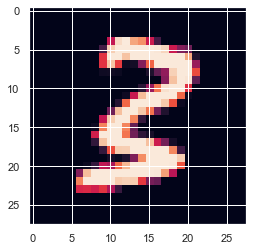

In [643]:
# Now you can display different images to visualize them

display_image(6711)

Now divide the dataset into training and test sets (around an 85-15 split).
More precisely, take the first 11900 images for the training set and the last 2100 for the test set.

Both the resulting splits/sets should be stored in Numpy arrays of shape (num_split_images, 785).
Depending on your approach, you can also separate the labels into a different array (or two arrays).

In [644]:
# Train-test split

#########################

train = data.head(11900)
train = train.to_numpy('float32')
print('train', train.shape)

test = data.tail(2100)
test = test.to_numpy('float32')
print('test', test.shape)

#########################

train (11900, 785)
test (2100, 785)


### Implementing k-NN Classifier

Now you need to implement all of the tasks that follow.

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

**Euclidean Distance:**

$$
d(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

**Manhattan Distance:**

$$
d(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [645]:
# Implement functions for Euclidean and Manhattan distances

#########################

# np.sum axis

def euclidean(chosen, collection):
    dist = []
    dist = np.linalg.norm(chosen-collection, axis=1)
    return np.array([dist])
    

def manhattan(chosen, collection):
    return np.array([np.sum(np.absolute(chosen - collection), axis=1)])

#########################

Next, create your own k-Nearest Neighbors classifier function by performing the following
tasks:
1. For a test data point, find its distance from all training
instances.
2. Sort the calculated distances in ascending order based on distance values.
3. Choose k training samples with minimum distances from the test data point.
4. Return the most frequent class of these samples. (Your function should work
with Euclidean distance as well as Manhattan distance. Pass the distance
metric as a parameter in the k-NN classifier function. Your function should
also be general enough to work with any value of k.)

For values of k where a tie occurs, you need to break the tie by backing off to the k-1 value. In case there is still a tie, you will continue decreasing k until there is a clear winner.

In [688]:
# Implement k-Nearest Neighbors classifier function
# Feel free to make any helper functions to assist you and to make the code modular

#########################

test_gold = test[:,0]
train_gold = train[:,0]

test_rem = test[:,1:]
train_rem = train[:,1:]


def mode(x):
    vals, counts = np.unique(x, return_counts=True)
    mode_value = np.argwhere(counts == np.max(counts))
    if (mode_value.size > 1):
        return -1
    else:
        return vals[mode_value[0][0]]
        
def single_label_e(test_pt, train_data, k):
    x = euclidean(np.array([test_pt]), train_data)
    indeces = np.argsort(x)
    x = np.sort(x)
    k_min = x[0][0:k]
    k_labels = indeces[0][0:k]
    k_gold_labels = train_gold[k_labels]
    mode_val = mode(np.array([k_gold_labels]))
    while mode_val == -1:
        k_gold_labels = k_gold_labels[0:-1]
        mode_val = mode(np.array([k_gold_labels]))
    return mode_val

def single_label_m(test_pt, train_data, k):
    x = manhattan(np.array([test_pt]), train_data)
    indeces = np.argsort(x)
    x = np.sort(x)
    k_min = x[0][0:k]
    k_labels = indeces[0][0:k]
    k_gold_labels = train_gold[k_labels]
    mode_val = mode(np.array([k_gold_labels]))
    while mode_val == -1:
        k_gold_labels = k_gold_labels[0:-1]
        mode_val = mode(np.array([k_gold_labels]))
    return mode_val
        

def knn(k, test, train, c):
    if (c == 'm'):
        x = [single_label_m(x, train, k) for x in test]
    elif (c == 'e'):
        x = [single_label_e(x, train, k) for x in test]
    return x

# print(knn(3, test_rem, train_rem, 'e'))
# knn(2, test_rem[0:55], train_rem, 'e')
# print(train_rem)

    
#########################

Next, implement an evaluation function that calculates the confusion matrix, classification accuracy and macro-average F1
score of your classifier. The function should take as input the predicted labels and the true labels. 

We recommend that you do not use hard coding in this function. Try it at your own risk :p

In [690]:
# Implement evaluation function

#########################

def confusion_matrix(predicted, true):
    confusion = np.zeros((10,10), dtype=int)
    for i in range(0,np.array(predicted).size):
        if (predicted[i] == true[i]):
            confusion[predicted[i].astype(int)][predicted[i].astype(int)] = 
            confusion[predicted[i].astype(int)][predicted[i].astype(int)] + 1
        else:
            confusion[predicted[i].astype(int)][true[i].astype(int)] = 
            confusion[predicted[i].astype(int)][true[i].astype(int)] + 1
#     print(confusion)
    return confusion

def evaluation(predicted, true):
    confusion = confusion_matrix(predicted, true)
    accuracy = np.trace(confusion)/np.sum(confusion) * 100
#     print('Accuracy = ', accuracy)
    precision = []
    recall = []
    col_sum = np.sum(confusion, axis=0)
    for i in range(0,10):
        precision.append(confusion[i][i]/np.sum(confusion[i]))
        recall.append(confusion[i][i]/col_sum[i])
#     print("Precision = ", precision)
#     print("Recall = ", recall)
    macro_precision = np.average(np.array(precision))
#     print("Macroaverage Precision = ", macro_precision)
    macro_recall = np.average(np.array(recall))
#     print("Macroaverage Recall = ", macro_recall)
    f1score = (2*macro_precision*macro_recall)/(macro_precision + macro_recall)
#     print("Macro-average F1 score = ", f1score)
    return [accuracy, f1score]

# pred_k = knn(3, test_rem, train_rem, 'e')    
# print(evaluation(pred_k, test_gold))

# predicted = knn(10, test_rem, train_rem, 'e')
# evaluation(predicted, test_gold)
# print(np.array(test_gold).size)
# print(np.sum(np.array([1,2,3]) == np.array([1,2,3])))
# print(predicted)
# print(test_gold)

#########################

Next, implement a function that performs m-fold cross-validation on the training data for a specified value of k. (In cross-validation, you divide
the training data set into m parts. m-1 parts will be used for training and 1 part
will be used for validation. Then you will take a different part of your data as a
validation data set and train your algorithm on the rest of the data set.) 

The function should return predicted labels for the entire training data (size of list/array should be equal to the size of training dataset) for the specified value of k. This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your evaluation function together with the actual labels.

In [691]:
# Implement function to perform m-fold cross-validation

#########################

def validation(m, k, train, c):
#     print('Here')
#     print(train.shape)
    validation_size = train.shape[0]/m
#     print(validation_size)
    validation_size = int(validation_size)
    validation_prediction = []
    for i in range(m):
#         print("fold = ", i)
        test_start = i * validation_size
#         print("start = ", test_start)
        test_end = (i * validation_size) + validation_size
#         print("end = ", test_end)
        validation_test = train[test_start:test_end]
        validation_train = np.concatenate((train[:test_start], train[test_end:]))
#         print(type(validation_train))
#         print(validation_test.shape)
#         print(validation_train.shape)
        validation_prediction = validation_prediction + knn(k, validation_test, validation_train, c)
    return validation_prediction

# x = validation(5, 3, train_rem, 'e')
# print(type(train_rem))
# print(np.array(x).shape)
# print(np.array(train_gold).shape)
# print(x)
# print(train_gold)
# validation_size = train_rem.shape[0]/5
# validation_size = int(validation_size)
# for i in range(5):
#     test_start = i * validation_size
#     test_end = (i * validation_size) + validation_size
#     print(np.sum(np.array(x)[test_start:test_end] == np.array(train_gold)[test_start:test_end]))
    
#########################

Now run your
cross-validation function on the training data using m = 5 for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do
this for both the Euclidean distance and the Manhattan distance for each value of
k. Also run your evaluation function for each value of k for both distance metrics and report confusion matrix, classification accuracy and F1 score.

Each confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.

k =  1
dist = m
[[629  60  54  56  49  75  61  63  52  71]
 [ 67 752  86  82  70  77  74  84  89  69]
 [ 55  86 590  66  51  34  34  76  50  56]
 [ 69  69  74 594  69  51  71  55  88  42]
 [ 59  74  47  66 600  48  65  52  65  86]
 [ 40  61  40  82  62 572  61  75  84  53]
 [ 59  74  61  48  63  50 655  71  58  49]
 [ 65  48  60  69  75  43  58 672  67  66]
 [ 33  59  66  82  64  55  55  45 584  59]
 [ 73  56  66  68  95  64  57  66  61 589]]
Accuracy =  52.411764705882355
F1 Score =  0.5240274150991429
dist = e
[[619  56  51  50  45  69  69  61  54  69]
 [ 72 752  93  82  69  70  68  87  84  68]
 [ 54  82 604  66  65  33  40  73  49  56]
 [ 69  68  69 605  69  53  66  61  85  42]
 [ 48  71  46  72 598  50  57  51  70  83]
 [ 37  59  40  77  58 570  61  72  77  53]
 [ 66  77  55  44  61  56 653  68  53  51]
 [ 72  53  62  70  83  47  58 679  69  58]
 [ 41  63  58  86  62  57  60  46 593  63]
 [ 71  58  66  61  88  64  59  61  64 597]]
Accuracy =  52.689075630252105
F1 Score =  0.526772

[[824  42  50  49  25  53  36  44  43  50]
 [ 38 980  86  49  69  66  47  69  72  53]
 [ 38  45 717  41  46  20  26  42  29  33]
 [ 35  45  56 790  39  36  46  42  69  43]
 [ 36  37  23  48 762  27  42  32  32  60]
 [ 15  31  25  46  31 706  33  44  57  48]
 [ 43  53  32  27  38  38 837  37  45  30]
 [ 58  36  71  63  61  36  41 874  54  55]
 [ 19  38  42  53  33  35  43  31 751  29]
 [ 43  32  42  47  94  52  40  44  46 739]]
Accuracy =  67.05882352941175
F1 Score =  0.6710723629787998
[[0, 1, 52.411764705882355, 0.5240274150991429], [1, 1, 52.689075630252105, 0.5267729315265284], [0, 2, 52.411764705882355, 0.5240274150991429], [1, 2, 52.689075630252105, 0.5267729315265284], [0, 3, 57.94957983193277, 0.5793256485202793], [1, 3, 58.29411764705882, 0.5826987580273669], [0, 4, 61.588235294117645, 0.6160442799057947], [1, 4, 62.2436974789916, 0.622312353817801], [0, 5, 64.14285714285714, 0.6416527164628847], [1, 5, 64.66386554621849, 0.6468391307952612], [0, 6, 65.6890756302521, 0.6572240

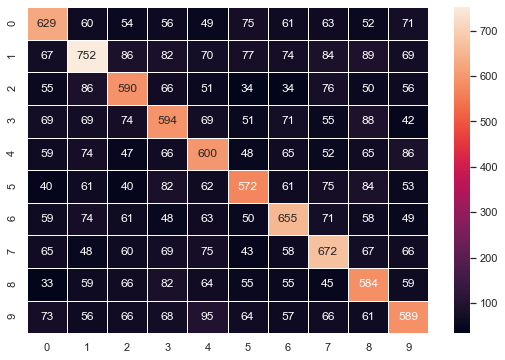

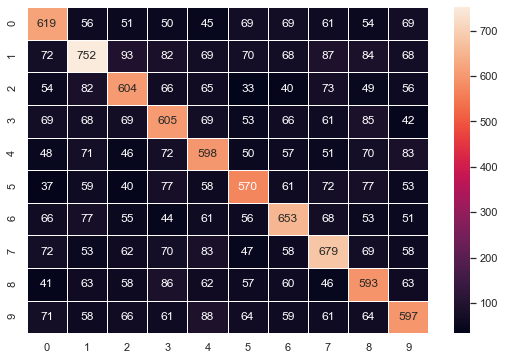

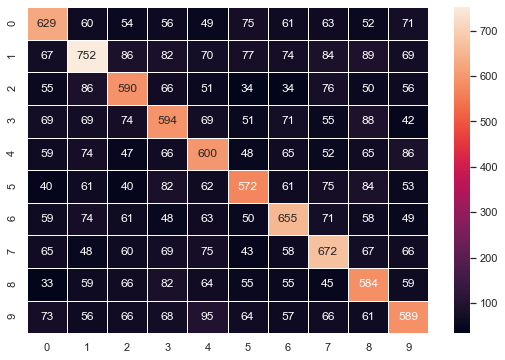

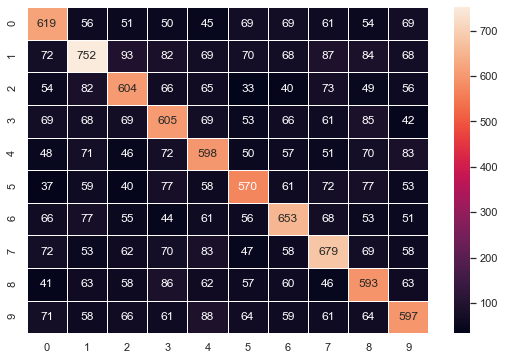

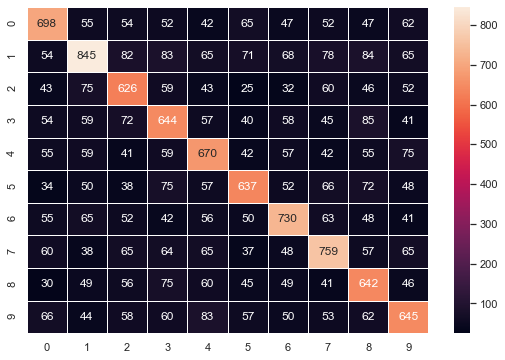

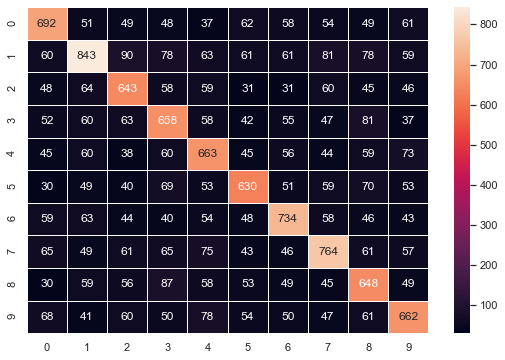

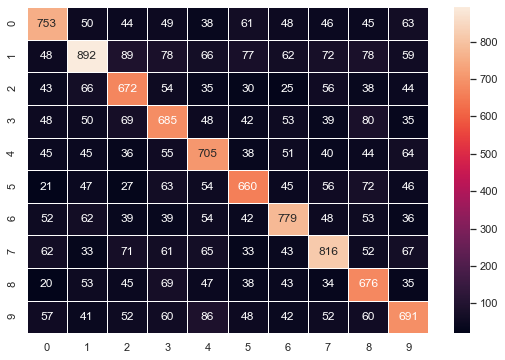

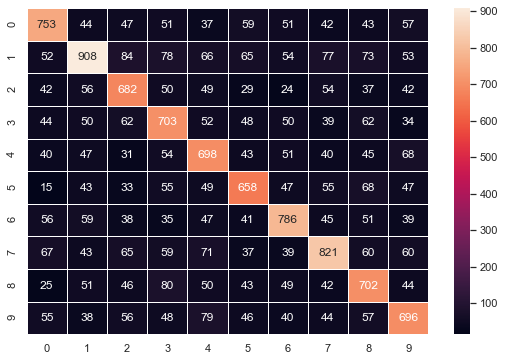

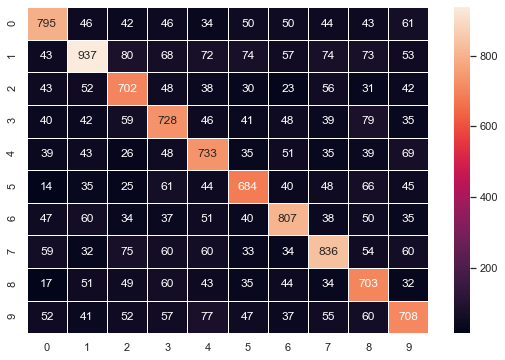

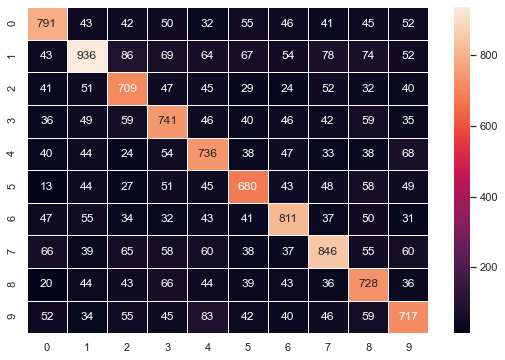

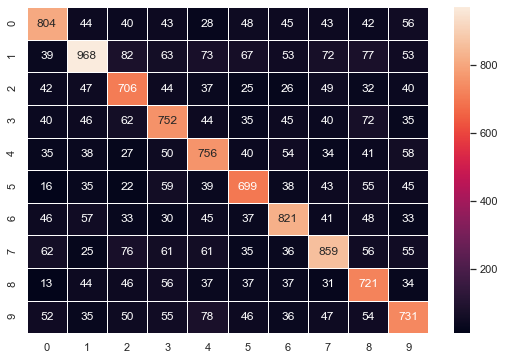

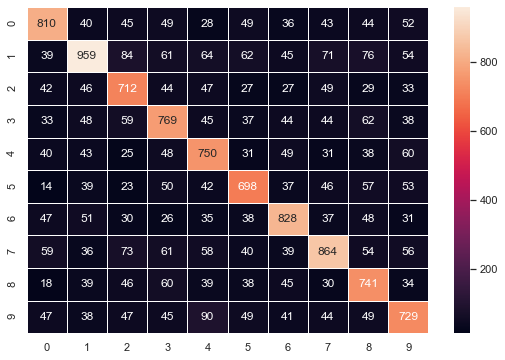

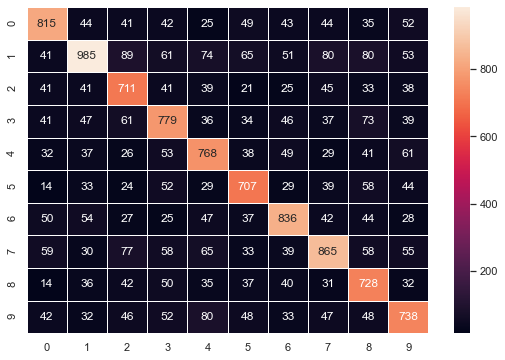

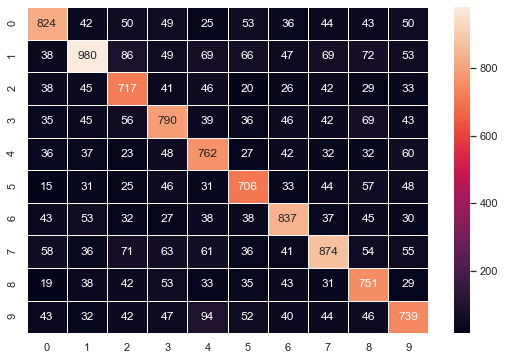

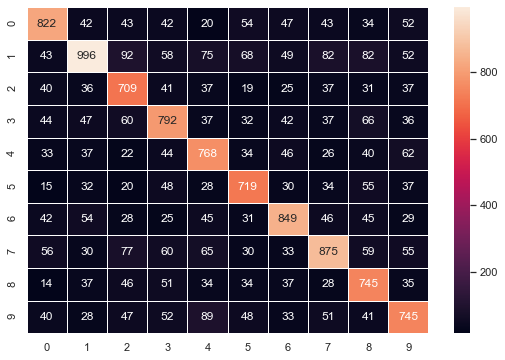

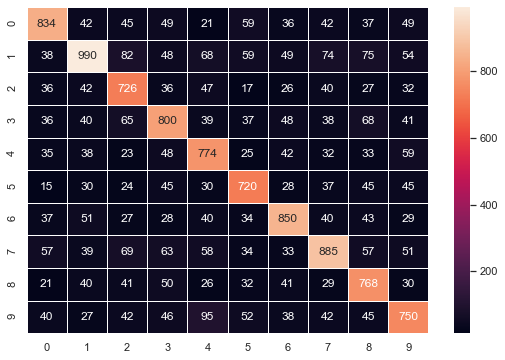

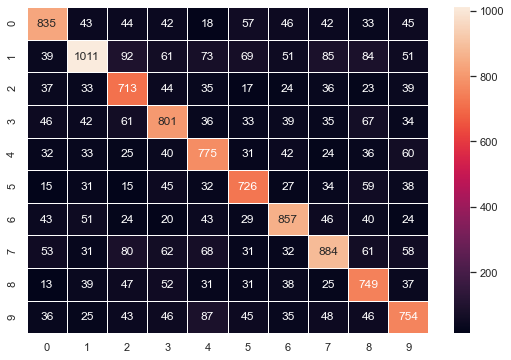

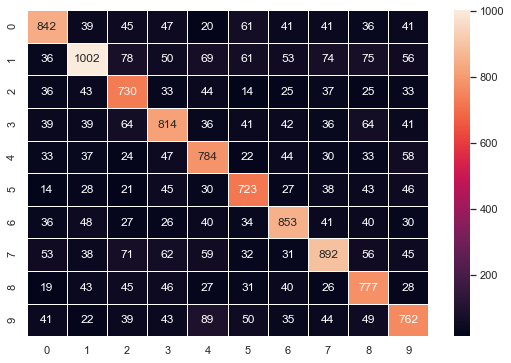

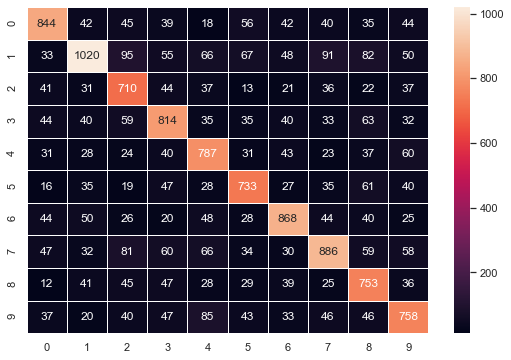

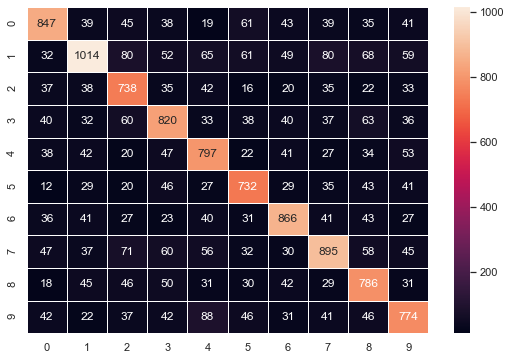

In [654]:
# Perform 5-fold cross-validation and report evaluation metrics

# POTENTIAL PROBLEM: SENDING WRONG TRAIN_GOLD INTO VALIDATION OR CONFUSION MATRIX

#########################
# k = [1,2,3,4,5,6,7,8,9,10]
k = [3]
sns.set_theme()
finaldataset = []
for i in k:
    print("k = ", i)
    
    print("dist = m")
    pred = validation(5,i,train_rem, 'm')
    confusion = confusion_matrix(pred, train_gold)
    scores = evaluation(pred, train_gold)
    print(confusion)
    print('Accuracy = ', scores[0])
    print('F1 Score = ', scores[1])
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
    finaldataset.append([0, i,scores[0], scores[1]])
    
    print("dist = e")
    pred = validation(5,i,train_rem, 'e')
    confusion = confusion_matrix(pred, train_gold)
    scores = evaluation(pred, train_gold)
    print(confusion)
    print('Accuracy = ', scores[0])
    print('F1 Score = ', scores[1])
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
    finaldataset.append([1, i,scores[0], scores[1]])
    
    print(finaldataset)
#     print(np.sum(confusion))
#     print(np.array(pred).size)
#     print(np.array(train_gold).size)
#     print("dist = e")
#     validation(5,i,train_rem, 'm'), train_gold

#########################

k =  3
dist = m
[[698  55  54  52  42  65  47  52  47  62]
 [ 54 845  82  83  65  71  68  78  84  65]
 [ 43  75 626  59  43  25  32  60  46  52]
 [ 54  59  72 644  57  40  58  45  85  41]
 [ 55  59  41  59 670  42  57  42  55  75]
 [ 34  50  38  75  57 637  52  66  72  48]
 [ 55  65  52  42  56  50 730  63  48  41]
 [ 60  38  65  64  65  37  48 759  57  65]
 [ 30  49  56  75  60  45  49  41 642  46]
 [ 66  44  58  60  83  57  50  53  62 645]]
Accuracy =  57.94957983193277
F1 Score =  0.5793256485202793


KeyboardInterrupt: 

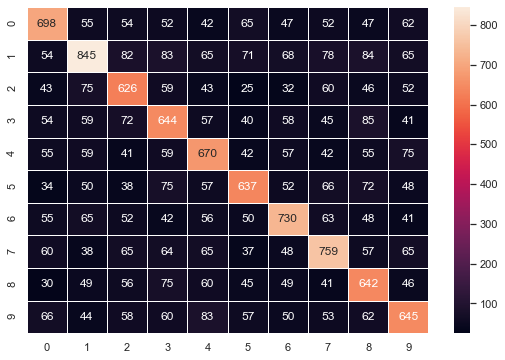

In [676]:
# Perform 5-fold cross-validation and report evaluation metrics
# CHECKKKKKKKKKKKKKKK
# POTENTIAL PROBLEM: SENDING WRONG TRAIN_GOLD INTO VALIDATION OR CONFUSION MATRIX

#########################
# k = [1,2,3,4,5,6,7,8,9,10]
k = [3]
sns.set_theme()
finaldataset = []
for i in k:
    print("k = ", i)
    
    print("dist = m")
    pred = validation(5,i,train_rem, 'm')
    confusion = confusion_matrix(pred, train_gold)
    scores = evaluation(pred, train_gold)
    print(confusion)
    print('Accuracy = ', scores[0])
    print('F1 Score = ', scores[1])
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
    finaldataset.append([0, i,scores[0], scores[1]])
    
#     print("dist = e")
#     pred = validation(5,i,train_rem, 'e')
#     confusion = confusion_matrix(pred, train_gold)
#     scores = evaluation(pred, train_gold)
#     print(confusion)
#     print('Accuracy = ', scores[0])
#     print('F1 Score = ', scores[1])
#     f, ax = plt.subplots(figsize=(9, 6))
#     sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
#     finaldataset.append([1, i,scores[0], scores[1]])
    
#     print(finaldataset)
#     print(np.sum(confusion))
#     print(np.array(pred).size)
#     print(np.array(train_gold).size)
#     print("dist = e")
#     validation(5,i,train_rem, 'm'), train_gold

#########################

Next, present the results as a graph with k values on the x-axis and classification accuracy
on the y-axis. Use a single plot to compare the two versions of the classifier (one
using Euclidean and the other using Manhattan distance metric). Make another
graph but with the F1 score on the y-axis this time. The graphs should be properly
labeled.

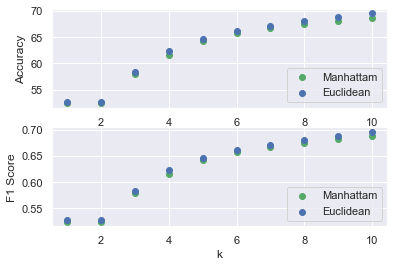

In [655]:
# Draw the required plots

#########################

# print(finaldataset)
def plots(finaldataset):
    finaldataset = np.array(finaldataset)
    mfold_k = finaldataset[:, 1]
    mfold_accuracy = finaldataset[:, 2]
    mfold_f1 = finaldataset[:, 3]
    mfold_d = finaldataset[:, 0]
    # print(mfold_k)
    # print(mfold_accuracy)
    # print(mfold_f1)
    # print(mfold_d)

    man_k = []
    man_acc = []
    man_f1 = []
    euc_k = []
    euc_acc = []
    euc_f1 = []
    for idx, i in enumerate(mfold_d):
        if (i == 0):
            man_k.append(mfold_k[idx])
            man_acc.append(mfold_accuracy[idx])
            man_f1.append(mfold_f1[idx])
        else:
            euc_k.append(mfold_k[idx])
            euc_acc.append(mfold_accuracy[idx])
            euc_f1.append(mfold_f1[idx])
    # print(man_k, man_acc, euc_k, euc_acc)

    plt.subplot(2,1,1)
    plt.scatter(man_k,man_acc, color = 'g')
    plt.scatter(euc_k,euc_acc, color = 'b')
    plt.legend(['Manhattam', 'Euclidean',], loc='lower right')
    plt.xlabel('k')
    plt.ylabel('Accuracy')

    plt.subplot(2,1,2)
    plt.scatter(man_k,man_f1, color = 'g')
    plt.scatter(euc_k,euc_f1, color = 'b')
    plt.legend(['Manhattam', 'Euclidean',], loc='lower right')
    plt.xlabel('k')
    plt.ylabel('F1 Score')
    plt.show()
    
plots(finaldataset)


#########################

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?

In [659]:
#########################

# The best value of k is 10 for both distances. Since k is large, the decision boundaries are smooth and hence, the decision
# boundaries are stable. 

#########################

Finally, use the best value of k for both distance metrics and run it on the test
dataset. Find the confusion matrix, classification accuracy and F1 score and print
them. Keep in mind the earlier instructions about displaying confusion matrices.

dist = m
[[202   0   2   0   0   0   6   0   1   1]
 [  0 239   9   0   3   0   2   9   4   3]
 [  0   1 202   1   0   0   2   1   0   0]
 [  0   0   0 183   0   4   0   1   4   2]
 [  0   1   1   1 201   0   1   0   1   3]
 [  1   0   0   4   0 168   0   0   6   0]
 [  1   0   1   0   1   5 204   0   2   0]
 [  0   0   3   2   0   1   0 197   0   5]
 [  0   0   0   0   0   1   0   0 186   1]
 [  0   0   1   0   3   1   0   6   6 203]]
Accuracy =  94.52380952380952
F1 Score =  0.9460767261854717
dist = e
[[202   0   2   0   0   0   4   0   1   1]
 [  0 239   6   0   3   0   2   7   2   2]
 [  0   1 205   1   0   0   0   1   0   0]
 [  0   0   0 185   0   3   0   1   4   2]
 [  0   1   1   1 200   0   2   0   1   2]
 [  1   0   0   3   0 169   0   0   5   0]
 [  1   0   1   0   1   5 206   0   0   0]
 [  0   0   2   1   0   1   0 198   0   4]
 [  0   0   1   0   0   1   0   0 191   1]
 [  0   0   1   0   4   1   1   7   6 206]]
Accuracy =  95.28571428571428
F1 Score =  0.953376298713042

<AxesSubplot:>

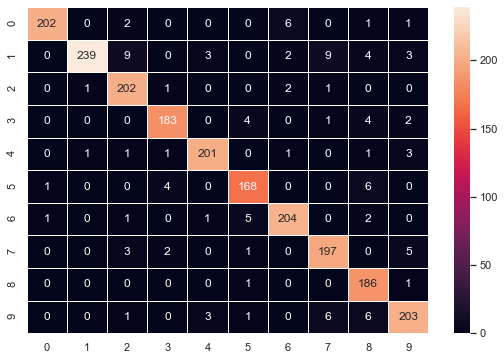

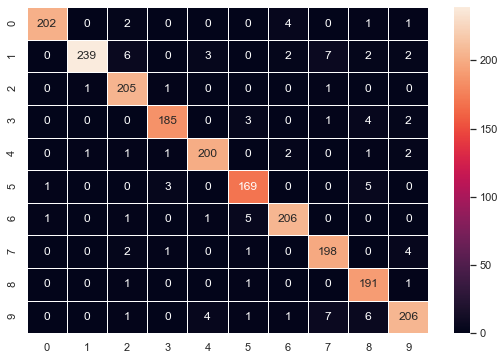

In [657]:
# Use best values of k on test dataset

#########################

finaldataset = np.array(finaldataset)

mfold_k = finaldataset[:, 1]
mfold_accuracy = finaldataset[:, 2]
mfold_f1 = finaldataset[:, 3]
mfold_d = finaldataset[:, 0]

man_k = []
man_acc = []
man_f1 = []
euc_k = []
euc_acc = []
euc_f1 = []
for idx, i in enumerate(mfold_d):
    if (i == 0):
        man_k.append(mfold_k[idx])
        man_acc.append(mfold_accuracy[idx])
        man_f1.append(mfold_f1[idx])
    else:
        euc_k.append(mfold_k[idx])
        euc_acc.append(mfold_accuracy[idx])
        euc_f1.append(mfold_f1[idx])

print("dist = m")
max_m = int(man_k[np.argmax(np.array(man_acc))])
pred = knn(max_m, test_rem, train_rem, 'm')
confusion = confusion_matrix(pred, test_gold)
scores = evaluation(pred, test_gold)
print(confusion)
print('Accuracy = ', scores[0])
print('F1 Score = ', scores[1])
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

print("dist = e")
max_e = int(euc_k[np.argmax(np.array(euc_acc))])
pred = knn(max_e, test_rem, train_rem, 'e')
confusion = confusion_matrix(pred, test_gold)
scores = evaluation(pred, test_gold)
print(confusion)
print('Accuracy = ', scores[0])
print('F1 Score = ', scores[1])
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

#########################

## **Part 2: Implement using Scikit-Learn (25 marks)**

In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your
classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1
but this time using scikit-learn. Perform 5-fold cross-validation and run
the k-NN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean
and Manhattan distance. Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the
accuracy, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels. Also present
the results as a graph with k values on the x-axis and performance measures on the y-axis
just like you did in Part 1. Use a single plot to compare the two versions of the classifier
(one using Euclidean and the other using Manhattan distance metric). Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics.

Note that the confusion matrices must be displayed in the same way as in Part 1.

k =  1
dist = e
Accuracy =  0.9481512605042017
F1 Score =  0.9477343320715331
dist = m
Accuracy =  0.9397478991596638
F1 Score =  0.939304214733847
k =  2
dist = e
Accuracy =  0.9363865546218487
F1 Score =  0.9355545593989614
dist = m
Accuracy =  0.9226890756302522
F1 Score =  0.9216617823726538
k =  3
dist = e
Accuracy =  0.9492436974789916
F1 Score =  0.9489077220029468
dist = m
Accuracy =  0.9382352941176471
F1 Score =  0.9379560440218697
k =  4
dist = e
Accuracy =  0.9459663865546218
F1 Score =  0.9456177722819815
dist = m
Accuracy =  0.9352100840336135
F1 Score =  0.9349350463157778
k =  5
dist = e
Accuracy =  0.9465546218487395
F1 Score =  0.9463284208935978
dist = m
Accuracy =  0.9374789915966386
F1 Score =  0.937380799312314
k =  6
dist = e
Accuracy =  0.9449579831932773
F1 Score =  0.9447422759066345
dist = m
Accuracy =  0.9366386554621848
F1 Score =  0.9366287905274902
k =  7
dist = e
Accuracy =  0.9447058823529412
F1 Score =  0.9445539834259102
dist = m
Accuracy =  0.9363025

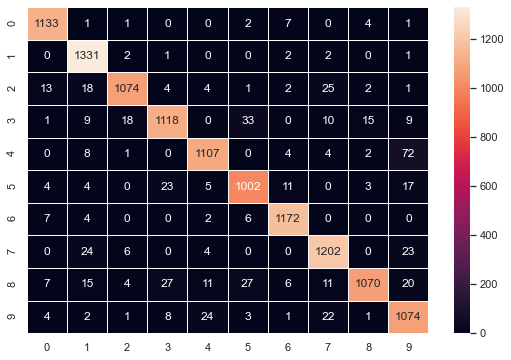

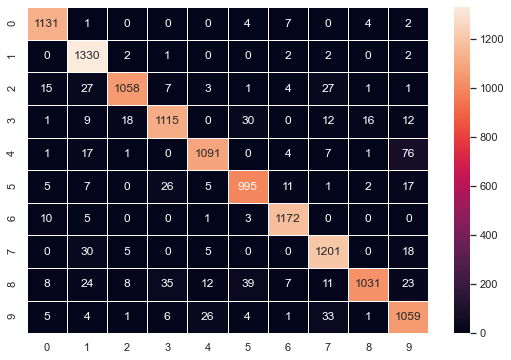

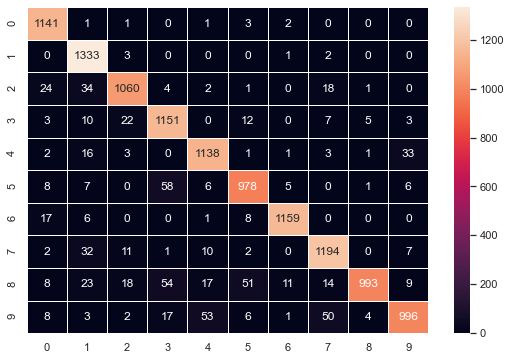

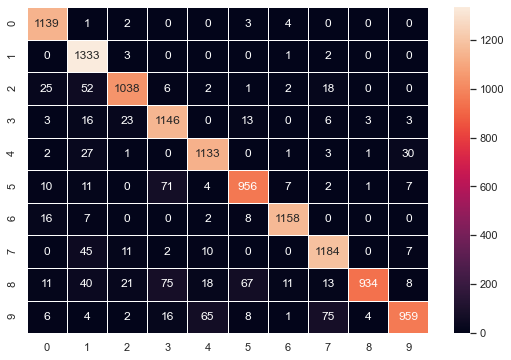

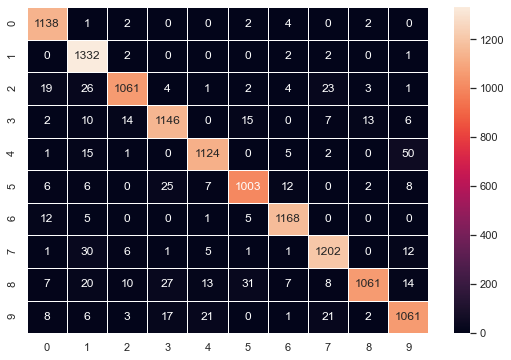

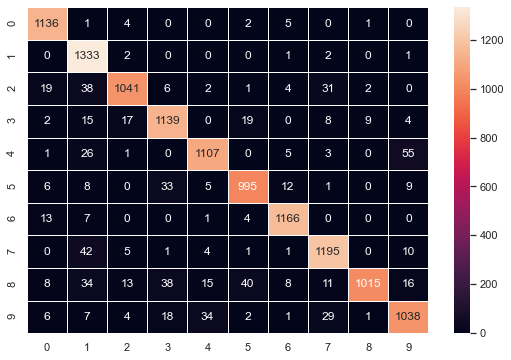

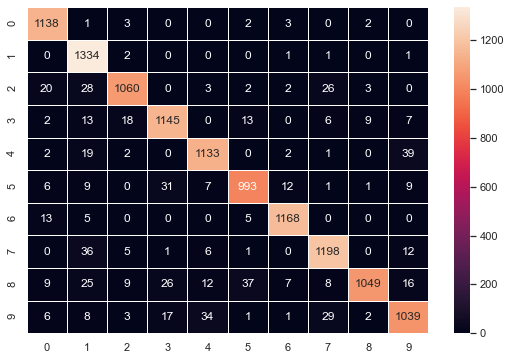

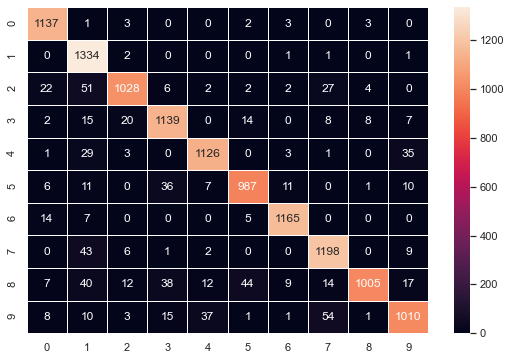

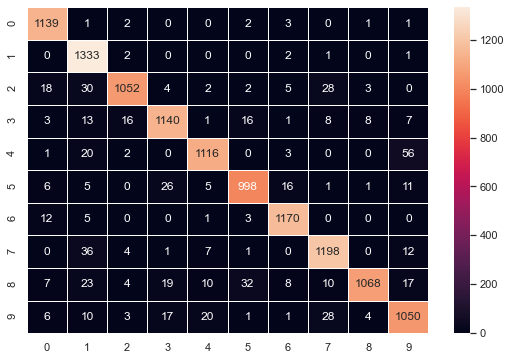

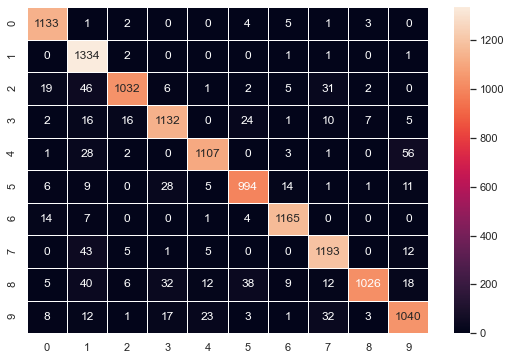

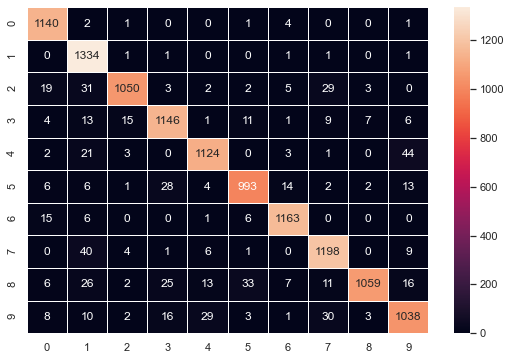

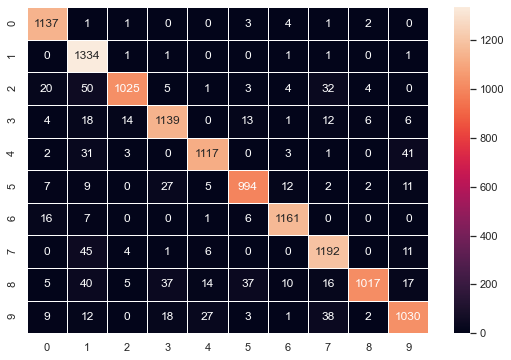

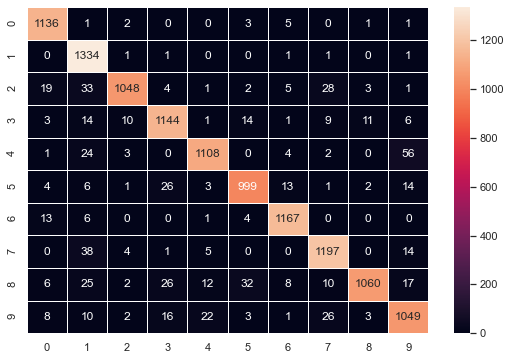

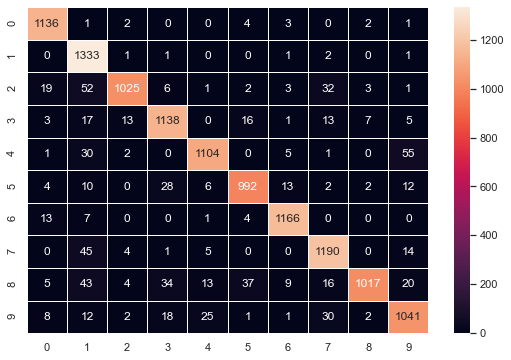

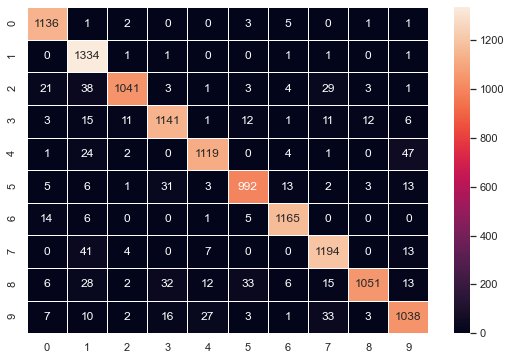

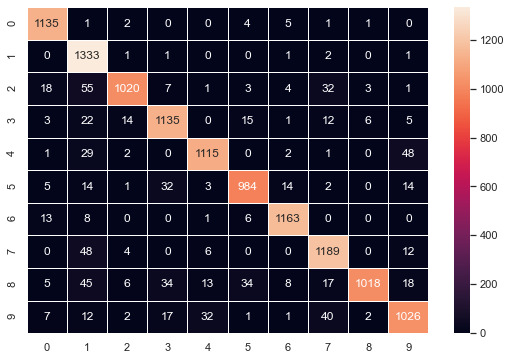

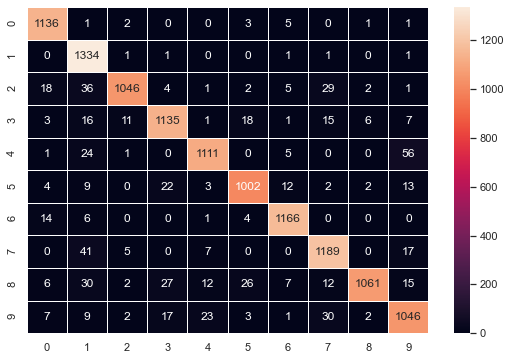

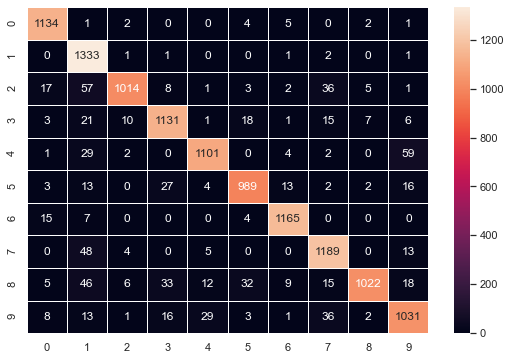

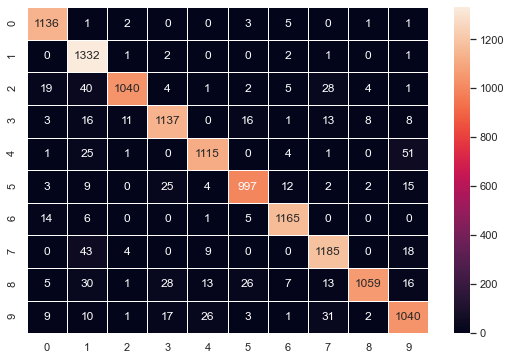

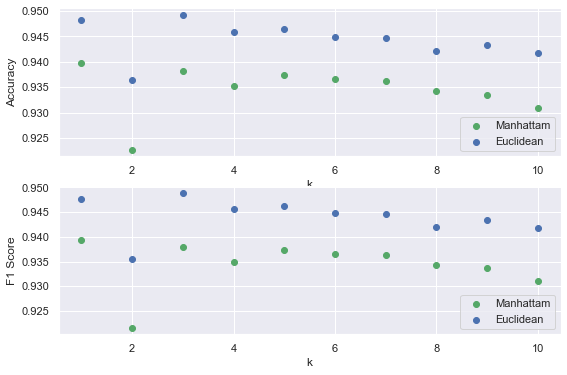

BEST
dist = e
Accuracy =  0.9547619047619048
F1 Score =  0.9546626713030898
dist = m
Accuracy =  0.9480952380952381
F1 Score =  0.947502770590105


<AxesSubplot:>

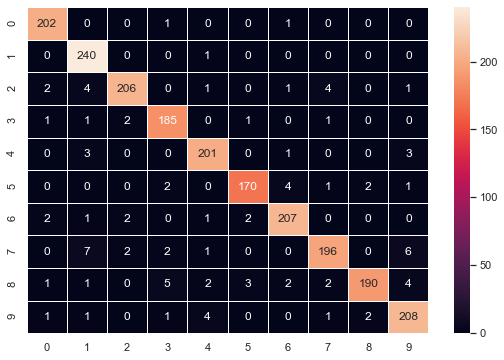

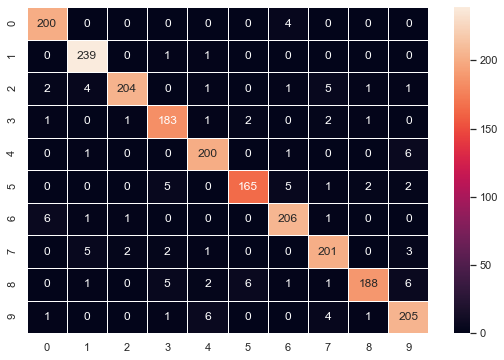

In [658]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
#     print(k_classifer)
#     k_classifer.fit(train_rem, train_gold)
#     y_pred = k_classifer.predict(test_rem)
k = [1,2,3,4,5,6,7,8,9,10]
# k = [1,2,3]
scores = []

for i in k:
    print("k = ", i)
    
    print('dist = e')
    k_classifer = KNeighborsClassifier(n_neighbors=i)
    y_pred = cross_val_predict(k_classifer, train_rem, train_gold, cv=5)
#     cv_scores = cross_val_score(k_classifer, train_rem, y_pred, cv=5)
    validation_accuracy = metrics.accuracy_score(train_gold, y_pred)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    report = classification_report(train_gold, y_pred, target_names=target_names, output_dict=True )
    validation_f1score = report['macro avg']['f1-score']
    scores.append([1, i, validation_accuracy, validation_f1score])
    confusion = confusion_matrix(train_gold, y_pred)
    print('Accuracy = ', validation_accuracy)
    print('F1 Score = ', validation_f1score)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
    
    print('dist = m')
    k_classifer = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    y_pred = cross_val_predict(k_classifer, train_rem, train_gold, cv=5)
#     cv_scores = cross_val_score(k_classifer, train_rem, y_pred, cv=5)
    validation_accuracy = metrics.accuracy_score(train_gold, y_pred)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    report = classification_report(train_gold, y_pred, target_names=target_names, output_dict=True )
    validation_f1score = report['macro avg']['f1-score']
    scores.append([0, i, validation_accuracy, validation_f1score])
    confusion = confusion_matrix(train_gold, y_pred)
    print('Accuracy = ', validation_accuracy)
    print('F1 Score = ', validation_f1score)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)
    
plots(scores)

# scores[0][0] = 1
scores = np.array(scores)
# print(scores)
# print(finaldataset)

mfold_k = scores[:, 1]
mfold_accuracy = scores[:, 2]
mfold_f1 = scores[:, 3]
mfold_d = scores[:, 0]

man_k = []
man_acc = []
man_f1 = []
euc_k = []
euc_acc = []
euc_f1 = []

for idx, i in enumerate(mfold_d):
    if (i == 0):
        man_k.append(mfold_k[idx])
        man_acc.append(mfold_accuracy[idx])
        man_f1.append(mfold_f1[idx])
    else:
        euc_k.append(mfold_k[idx])
        euc_acc.append(mfold_accuracy[idx])
        euc_f1.append(mfold_f1[idx])
        
print('BEST')
print('dist = e')
max_e = int(euc_k[np.argmax(np.array(euc_acc))])
k_classifer = KNeighborsClassifier(n_neighbors=max_e)
k_classifer.fit(train_rem, train_gold)
y_pred = k_classifer.predict(test_rem)
confusion = confusion_matrix(test_gold, y_pred)
Accuracy = accuracy_score(test_gold, y_pred)
f1score = f1_score(test_gold, y_pred, average='macro')
print('Accuracy = ', Accuracy)
print('F1 Score = ', f1score)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

print('dist = m')
max_m = int(man_k[np.argmax(np.array(man_acc))])
k_classifer = KNeighborsClassifier(n_neighbors=max_m, metric='manhattan')
k_classifer.fit(train_rem, train_gold)
y_pred = k_classifer.predict(test_rem)
confusion = confusion_matrix(test_gold, y_pred)
Accuracy = accuracy_score(test_gold, y_pred)
f1score = f1_score(test_gold, y_pred, average='macro')
print('Accuracy = ', Accuracy)
print('F1 Score = ', f1score)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)


